In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


In [3]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'Skin Thickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv("PimaDiabetes.csv", header=None, names=col_names)
df_orig=df.copy()

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
Skin Thickness              768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.head()

Pregnancies  Glucose  BloodPressure  Skin Thickness  Insulin   BMI  \
0            6      148             72              35        0  33.6   
1            1       85             66              29        0  26.6   
2            8      183             64               0        0  23.3   
3            1       89             66              23       94  28.1   
4            0      137             40              35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [56]:
# print 5 random rows
df.sample(n=5, random_state=1)

Pregnancies  Glucose  BloodPressure  Skin Thickness  Insulin   BMI  \
285            7      136             74              26      135  26.0   
101            1      151             60               0        0  26.1   
581            6      109             60              27        0  25.0   
352            3       61             82              28        0  34.4   
726            1      116             78              29      180  36.1   

     DiabetesPedigreeFunction  Age  Outcome  
285                     0.647   51        0  
101                     0.179   22        0  
581                     0.206   27        0  
352                     0.243   46        0  
726                     0.496   25        0

In [155]:
df.describe()

Pregnancies     Glucose  BloodPressure  Skin Thickness     Insulin  \
count   768.000000  768.000000     768.000000      768.000000  768.000000   
mean      3.845052  120.894531      69.105469       20.536458   79.799479   
std       3.369578   31.972618      19.355807       15.952218  115.244002   
min       0.000000    0.000000       0.000000        0.000000    0.000000   
25%       1.000000   99.000000      62.000000        0.000000    0.000000   
50%       3.000000  117.000000      72.000000       23.000000   30.500000   
75%       6.000000  140.250000      80.000000       32.000000  127.250000   
max      17.000000  199.000000     122.000000       99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [169]:
df[1:5]

Pregnancies  Glucose  BloodPressure  Skin Thickness  Insulin   BMI  \
1            1       85             66              29        0  26.6   
2            8      183             64               0        0  23.3   
3            1       89             66              23       94  28.1   
4            0      137             40              35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [171]:
df[['Glucose','Insulin']] #Double Brackets for column accsess

Glucose  Insulin
0        148        0
1         85        0
2        183        0
3         89       94
4        137      168
..       ...      ...
763      101      180
764      122        0
765      121      112
766      126        0
767       93        0

[768 rows x 2 columns]

In [181]:
df[['Glucose','Insulin']][1:5] #Double Brackets for column accsess and additional outer brackets for rows


Glucose  Insulin
1       85        0
2      183        0
3       89       94
4      137      168

In [182]:
df.loc[1:5,['Glucose','Insulin']] # loc method allow indexing with string in column


Glucose  Insulin
1       85        0
2      183        0
3       89       94
4      137      168
5      116        0

In [185]:
df.iloc[1:5,1:3] # loc method allow indexing with integers in column

Glucose  BloodPressure
1       85             66
2      183             64
3       89             66
4      137             40

check what the precentage of the diabetes 

In [207]:
df['Outcome'].value_counts(normalize=True)#normalize=True

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [192]:
df[df['Glucose']>150].shape #how many with glucose higher than 150

(140, 9)

In [194]:
df[(df['Glucose']>150) & (df['Insulin']>150)].shape #how many with glucose and insulin higher than 150

(57, 9)

In [205]:
df[df['Insulin'].isin([85,137])] #check whether there is insulin with levels of 85 or 137

Pregnancies  Glucose  BloodPressure  Skin Thickness  Insulin   BMI  \
313            3      113             50              10       85  29.5   
431            3       89             74              16       85  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
313                     0.626   25        0  
431                     0.551   38        0

In [168]:
df1 = df[['Glucose','Insulin']] #or .copy()
#pd.options.mode.chained_assignment = None  # default='warn'
df1.iloc[1,:] = df1.iloc[2,:] #change between rows
df.head()

C:\Users\alonb\Anaconda3\envs\spyder-beta\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Pregnancies  Glucose  BloodPressure  Skin Thickness  Insulin   BMI  \
0            6      148             72              35        0  33.6   
1            1       85             66              29        0  26.6   
2            8      183             64               0        0  23.3   
3            1       89             66              23       94  28.1   
4            0      137             40              35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [268]:
df.mean() #diffrent method in padnas data frame

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
Skin Thickness               20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [55]:
for index,row in df.iterrows():
    
    print(row['Age'])

50.0
31.0
32.0
21.0
33.0
30.0
26.0
29.0
53.0
54.0
30.0
34.0
57.0
59.0
51.0
32.0
31.0
31.0
33.0
32.0
27.0
50.0
41.0
29.0
51.0
41.0
43.0
22.0
57.0
38.0
60.0
28.0
22.0
28.0
45.0
33.0
35.0
46.0
27.0
56.0
26.0
37.0
48.0
54.0
40.0
25.0
29.0
22.0
31.0
24.0
22.0
26.0
30.0
58.0
42.0
21.0
41.0
31.0
44.0
22.0
21.0
39.0
36.0
24.0
42.0
32.0
38.0
54.0
25.0
27.0
28.0
26.0
42.0
23.0
22.0
22.0
41.0
27.0
26.0
24.0
22.0
22.0
36.0
22.0
37.0
27.0
45.0
26.0
43.0
24.0
21.0
34.0
42.0
60.0
21.0
40.0
24.0
22.0
23.0
31.0
33.0
22.0
21.0
24.0
27.0
21.0
27.0
37.0
25.0
24.0
24.0
46.0
23.0
25.0
39.0
61.0
38.0
25.0
22.0
21.0
25.0
24.0
23.0
69.0
23.0
26.0
30.0
23.0
40.0
62.0
33.0
33.0
30.0
39.0
26.0
31.0
21.0
22.0
29.0
28.0
55.0
38.0
22.0
42.0
23.0
21.0
41.0
34.0
65.0
22.0
24.0
37.0
42.0
23.0
43.0
36.0
21.0
23.0
22.0
47.0
36.0
45.0
27.0
21.0
32.0
41.0
22.0
34.0
29.0
29.0
36.0
29.0
25.0
23.0
33.0
36.0
42.0
26.0
47.0
37.0
32.0
23.0
21.0
27.0
40.0
41.0
60.0
33.0
31.0
25.0
21.0
40.0
36.0
40.0
42.0
29.0
21.0
23.0
26.0
29.0


In [22]:
def addingWithCodition(x):
    val=5
    if x<val:
        x+=15
    else:
        x-=val
    return x



In [23]:
df['Pregnancies']

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

In [24]:
xPreg = df['Pregnancies'].map(addingWithCodition)
xPreg

0       1
1      16
2       3
3      16
4      15
       ..
763     5
764    17
765     0
766    16
767    16
Name: Pregnancies, Length: 768, dtype: int64

In [25]:
xPreg = df[['Pregnancies']].applymap(addingWithCodition)
xPreg

Pregnancies
0              1
1             16
2              3
3             16
4             15
..           ...
763            5
764           17
765            0
766           16
767           16

[768 rows x 1 columns]

In [27]:
df.head()

Pregnancies  Glucose  BloodPressure  Skin Thickness  Insulin   BMI  \
0            6      148             72              35        0  33.6   
1            1       85             66              29        0  26.6   
2            8      183             64               0        0  23.3   
3            1       89             66              23       94  28.1   
4            0      137             40              35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [226]:
#df1=df.copy()
df.loc[:,'Glucose':'BMI'].agg('median') #run function on certain columns


Glucose           117.0
BloodPressure      72.0
Skin Thickness     23.0
Insulin            30.5
BMI                32.0
dtype: float64

In [253]:
df_nan =df.copy()
df_nan.loc[:,'Glucose':'BMI'] = df_nan.loc[:,'Glucose':'BMI'].replace(0,np.NAN) #replace the un-realistic results with nan
df_nan.head()

Pregnancies  Glucose  BloodPressure  Skin Thickness  Insulin   BMI  \
0            6    148.0           72.0            35.0      NaN  33.6   
1            1     85.0           66.0            29.0      NaN  26.6   
2            8    183.0           64.0             NaN      NaN  23.3   
3            1     89.0           66.0            23.0     94.0  28.1   
4            0    137.0           40.0            35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [236]:
df_nan.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
Skin Thickness               29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [246]:
df_nan.loc[:,'Glucose':'BMI']=df_nan.loc[:,'Glucose':'BMI'].fillna(df.median()) #method 1

In [248]:
df_nan.head()

Pregnancies  Glucose  BloodPressure  Skin Thickness  Insulin   BMI  \
0            6    148.0           72.0            35.0     30.5  33.6   
1            1     85.0           66.0            29.0     30.5  26.6   
2            8    183.0           64.0            23.0     30.5  23.3   
3            1     89.0           66.0            23.0     94.0  28.1   
4            0    137.0           40.0            35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [250]:
from sklearn.impute import SimpleImputer #method 2, mostly prefered due to it's generalize form 
imputer = SimpleImputer(strategy="median")
imputer.fit(df_nan)
X = imputer.transform(df_nan)
df1 = pd.DataFrame(X, columns=df_nan.columns)
df1.head()

Pregnancies  Glucose  BloodPressure  Skin Thickness  Insulin   BMI  \
0          6.0    148.0           72.0            35.0    125.0  33.6   
1          1.0     85.0           66.0            29.0    125.0  26.6   
2          8.0    183.0           64.0            29.0    125.0  23.3   
3          1.0     89.0           66.0            23.0     94.0  28.1   
4          0.0    137.0           40.0            35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0

In [254]:
df.loc[:,'Glucose':'BMI'] = df.loc[:,'Glucose':'BMI'].replace(0,np.NAN) #replace the un-realistic results with nan
df.dropna(inplace=True) #of course with medical data it's almost best to drop missing data

In [262]:
df.sort_values(by='Pregnancies')

Pregnancies  Glucose  BloodPressure  Skin Thickness  Insulin   BMI  \
467            0       97             64              36      100  36.8   
109            0       95             85              25       36  37.4   
452            0       91             68              32      210  39.9   
449            0      120             74              18       63  30.5   
448            0      104             64              37       64  33.6   
..           ...      ...            ...             ...      ...   ...   
357           13      129              0              30        0  39.9   
298           14      100             78              25      184  36.6   
455           14      175             62              30        0  33.6   
88            15      136             70              32      110  37.1   
159           17      163             72              41      114  40.9   

     DiabetesPedigreeFunction  Age  Outcome  
467                     0.600   25        0  
109                     0.247   24        1  
452                     0.381   25        0  
449                     0.285   26        0  
448                     0.510   22        1  
..                        ...  ...      ...  
357                     0.569   44        1  
298                     0.412   46        1  
455                     0.212   38        1  
88                      0.153   43        1  
159                     0.817   47        1  

[768 rows x 9 columns]

In [28]:
df.groupby('Pregnancies').describe()

Glucose                                                       \
              count        mean        std    min     25%    50%     75%   
Pregnancies                                                                
0             111.0  123.000000  29.408719   57.0  102.00  119.0  138.00   
1             135.0  112.748148  33.642040    0.0   91.50  109.0  129.00   
2             103.0  110.796117  26.075817   56.0   92.00  108.0  123.50   
3              75.0  123.586667  33.539849   61.0   99.00  116.0  149.00   
4              68.0  125.117647  27.686157   76.0  102.00  123.0  144.25   
5              57.0  118.859649  32.955835    0.0  103.00  116.0  139.00   
6              50.0  120.800000  34.751009    0.0  102.00  114.5  142.25   
7              45.0  136.444444  34.458510   62.0  107.00  136.0  160.00   
8              38.0  131.736842  37.772923   65.0  105.50  122.0  164.00   
9              28.0  131.392857  31.582155   57.0  112.00  132.0  156.00   
10             24.0  120.916667  28.612732   68.0  101.00  118.5  134.50   
11             11.0  126.454545  20.171086   85.0  115.50  135.0  138.00   
12              9.0  113.555556  25.219591   84.0   92.00  106.0  140.00   
13             10.0  125.500000  27.040094   76.0  106.00  127.5  150.25   
14              2.0  137.500000  53.033009  100.0  118.75  137.5  156.25   
15              1.0  136.000000        NaN  136.0  136.00  136.0  136.00   
17              1.0  163.000000        NaN  163.0  163.00  163.0  163.00   

                   BloodPressure             ...    Age       Outcome  \
               max         count       mean  ...    75%   max   count   
Pregnancies                                  ...                        
0            198.0         111.0  67.153153  ...  28.00  67.0   111.0   
1            199.0         135.0  67.792593  ...  29.00  62.0   135.0   
2            197.0         103.0  63.252427  ...  27.00  72.0   103.0   
3            193.0          75.0  66.586667  ...  31.00  63.0    75.0   
4            197.0          68.0  70.029412  ...  36.00  70.0    68.0   
5            189.0          57.0  76.210526  ...  45.00  69.0    57.0   
6            195.0          50.0  68.420000  ...  48.25  66.0    50.0   
7            196.0          45.0  70.777778  ...  43.00  61.0    45.0   
8            197.0          38.0  75.184211  ...  53.50  68.0    38.0   
9            184.0          28.0  77.892857  ...  49.00  81.0    28.0   
10           179.0          24.0  70.208333  ...  48.00  63.0    24.0   
11           155.0          11.0  74.181818  ...  50.50  51.0    11.0   
12           151.0           9.0  76.333333  ...  48.00  62.0     9.0   
13           158.0          10.0  73.800000  ...  44.75  57.0    10.0   
14           175.0           2.0  70.000000  ...  44.00  46.0     2.0   
15           136.0           1.0  70.000000  ...  43.00  43.0     1.0   
17           163.0           1.0  72.000000  ...  47.00  47.0     1.0   

                                                          
                 mean       std  min  25%  50%  75%  max  
Pregnancies                                               
0            0.342342  0.476645  0.0  0.0  0.0  1.0  1.0  
1            0.214815  0.412223  0.0  0.0  0.0  0.0  1.0  
2            0.184466  0.389760  0.0  0.0  0.0  0.0  1.0  
3            0.360000  0.483232  0.0  0.0  0.0  1.0  1.0  
4            0.338235  0.476627  0.0  0.0  0.0  1.0  1.0  
5            0.368421  0.486664  0.0  0.0  0.0  1.0  1.0  
6            0.320000  0.471212  0.0  0.0  0.0  1.0  1.0  
7            0.555556  0.502519  0.0  0.0  1.0  1.0  1.0  
8            0.578947  0.500355  0.0  0.0  1.0  1.0  1.0  
9            0.642857  0.487950  0.0  0.0  1.0  1.0  1.0  
10           0.416667  0.503610  0.0  0.0  0.0  1.0  1.0  
11           0.636364  0.504525  0.0  0.0  1.0  1.0  1.0  
12           0.444444  0.527046  0.0  0.0  0.0  1.0  1.0  
13           0.500000  0.527046  0.0  0.0  0.5  1.0  1.0  
14           1.000000  0.00

In [265]:
df.groupby('Pregnancies').describe()['Age']

count       mean        std   min    25%   50%    75%   max
Pregnancies                                                             
0            111.0  27.603604   9.688118  21.0  22.00  25.0  28.00  67.0
1            135.0  27.370370   8.113689  21.0  22.00  24.0  29.00  62.0
2            103.0  27.194175   9.553829  21.0  22.00  25.0  27.00  72.0
3             75.0  29.026667   8.104009  21.0  24.00  27.0  31.00  63.0
4             68.0  32.779412  10.971939  21.0  26.00  30.0  36.00  70.0
5             57.0  39.035088  12.457019  24.0  29.00  36.0  45.00  69.0
6             50.0  39.340000  11.966978  23.0  29.00  36.5  48.25  66.0
7             45.0  41.111111   7.932162  24.0  36.00  41.0  43.00  61.0
8             38.0  45.368421  10.693320  22.0  39.00  43.0  53.50  68.0
9             28.0  44.178571  10.396059  29.0  37.50  44.0  49.00  81.0
10            24.0  42.666667   9.365369  29.0  36.75  40.5  48.00  63.0
11            11.0  44.545455   6.186496  35.0  41.00  45.0  50.50  51.0
12             9.0  47.444444   7.763876  38.0  44.00  46.0  48.00  62.0
13            10.0  44.500000   5.835714  38.0  41.25  43.5  44.75  57.0
14             2.0  42.000000   5.656854  38.0  40.00  42.0  44.00  46.0
15             1.0  43.000000        NaN  43.0  43.00  43.0  43.00  43.0
17             1.0  47.000000        NaN  47.0  47.00  47.0  47.00  47.0

In [30]:
Preg_group = df.groupby('Pregnancies')
Preg_group

In [41]:
for name,group in Preg_group:
    print(name)
    print((group))

0
     Pregnancies  Glucose  BloodPressure  Skin Thickness  Insulin   BMI  \
4              0      137             40              35      168  43.1   
16             0      118             84              47      230  45.8   
45             0      180             66              39        0  42.0   
57             0      100             88              60      110  46.8   
58             0      146             82               0        0  40.5   
..           ...      ...            ...             ...      ...   ...   
713            0      134             58              20      291  26.4   
727            0      141             84              26        0  32.4   
736            0      126             86              27      120  27.4   
753            0      181             88              44      510  43.3   
757            0      123             72               0        0  36.3   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  
16   

In [33]:
Preg_group.get_group(5)['Age'].shape #get the women with 5 pregnancies

(57,)

In [38]:
Preg_group.filter(lambda x:len(x)>24)

Pregnancies  Glucose  BloodPressure  Skin Thickness  Insulin   BMI  \
0              6      148             72              35        0  33.6   
1              1       85             66              29        0  26.6   
2              8      183             64               0        0  23.3   
3              1       89             66              23       94  28.1   
4              0      137             40              35      168  43.1   
..           ...      ...            ...             ...      ...   ...   
762            9       89             62               0        0  22.5   
764            2      122             70              27        0  36.8   
765            5      121             72              23      112  26.2   
766            1      126             60               0        0  30.1   
767            1       93             70              31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
762                     0.142   33        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[710 rows x 9 columns]

In [267]:
Preg_group['Age'].max()

Pregnancies
0     67
1     62
2     72
3     63
4     70
5     69
6     66
7     61
8     68
9     81
10    63
11    51
12    62
13    57
14    46
15    43
17    47
Name: Age, dtype: int64

In [215]:
Gl = df.groupby('Age')[['Glucose']].describe()
Gl

Glucose                                                            
      count        mean        std    min     25%    50%     75%    max
Age                                                                    
21     62.0  110.064516  20.975295   71.0   96.25  108.0  125.00  177.0
22     70.0  111.300000  30.430891   56.0   91.00  104.5  129.50  199.0
23     38.0  111.578947  25.313848   68.0   93.00  108.0  125.50  179.0
24     46.0  117.891304  26.274811   77.0  100.50  112.0  128.00  193.0
25     48.0  110.083333  30.790876   68.0   86.75  103.0  125.50  193.0
26     33.0  118.212121  27.638015   71.0  100.00  112.0  129.00  181.0
27     32.0  115.281250  24.205084   73.0   98.25  110.5  128.25  166.0
28     35.0  119.914286  28.285697   80.0   99.50  115.0  141.00  198.0
29     29.0  127.379310  28.733273   86.0  107.00  122.0  146.00  196.0
30     21.0  122.285714  22.134007   88.0  110.00  117.0  124.00  170.0
31     24.0  126.958333  34.631575   85.0  102.25  116.0  148.25  197.0
32     16.0  116.312500  29.832239   81.0   98.50  105.0  129.50  183.0
33     17.0  122.882353  27.845292   75.0  103.00  121.0  137.00  173.0
34     14.0  131.857143  31.646745   83.0  114.25  123.0  148.75  191.0
35     10.0  121.400000  32.619694   77.0   96.75  119.5  137.50  180.0
36     16.0  132.437500  41.705265   44.0  100.25  142.0  162.75  187.0
37     18.0  137.388889  27.086222   88.0  120.25  133.0  148.50  189.0
38     16.0  121.125000  33.555675   72.0  103.25  114.5  134.50  181.0
39     12.0  126.750000  37.603494   74.0   93.00  131.0  153.25  197.0
40     13.0  130.923077  20.167885   96.0  117.00  126.0  144.00  168.0
41     21.0  135.238095  45.767789   57.0  104.00  129.0  180.00  196.0
42     18.0  109.555556  25.576235   65.0   91.75  104.5  123.75  156.0
43     13.0  133.000000  31.511903   95.0  100.00  136.0  152.00  188.0
44      8.0  124.375000  21.400517   92.0  112.75  123.0  135.50  158.0
45     15.0  131.200000  23.911145  102.0  111.00  128.0  147.00  183.0
46     13.0  105.923077  27.641941   61.0   92.00  102.0  118.00  155.0
47      6.0  137.000000  36.731458   68.0  130.25  152.0  161.00  163.0
48      5.0  107.600000  13.296616   88.0  104.00  106.0  120.00  120.0
49      5.0  153.000000  26.277367  125.0  126.00  165.0  165.00  184.0
50      8.0  138.250000  22.783139   99.0  130.00  142.5  151.50  164.0
51      8.0  147.625000  19.272019  125.0  133.75  145.5  157.75  181.0
52      8.0  133.000000  31.043748   97.0  107.50  123.5  163.50  176.0
53      5.0  158.000000  36.551334  105.0  145.00  156.0  187.00  197.0
54      6.0  140.333333  24.311863  109.0  125.00  137.5  159.00  171.0
55      4.0  140.750000  38.921930  103.0  121.75  132.5  151.50  195.0
56      3.0   98.333333  11.150486   90.0   92.00   94.0  102.50  111.0
57      5.0  137.800000  38.206020   95.0  114.00  139.0  145.00  196.0
58      7.0  135.142857  32.457298   91.0  111.00  140.0  158.50  176.0
59      3.0  173.333333  31.564748  137.0  163.00  189.0  191.50  194.0
60      5.0  146.400000  32.074912  109.0  129.00  134.0  179.00  181.0
61      2.0  144.000000   2.828427  142.0  143.00  144.0  145.00  146.0
62      4.0  139.500000  40.245083  105.0  117.00  128.0  150.50  197.0
63      4.0  133.250000  24.019090  101.0  124.25  137.0  146.00  158.0
64      1.0  120.000000        NaN  120.0  120.00  120.0  120.00  120.0
65      3.0  137.000000  30.265492  103.0  125.00  147.0  154.00  161.0
66      4.0  157.000000  31.728011  114.0  147.00  162.0  172.00  190.0
67      3.0  132.333333  69.514986   57.0  101.50  146.0  170.00  194.0
68      1.0   91.000000        NaN   91.0   91.00   91.0   91.00   91.0
69      2.0  134.000000   2.828427  132.0  133.00  134.0  135.00  136.0
70      1.0  145.000000        NaN  145.0  145.00  145.0  145.00  145.0
72      1.0  119.000000        NaN  119.0  119.00  119.0  119.00  119.0
81      1.0  134.000000        NaN  134.0  134.00  134.0  134.00  134.0

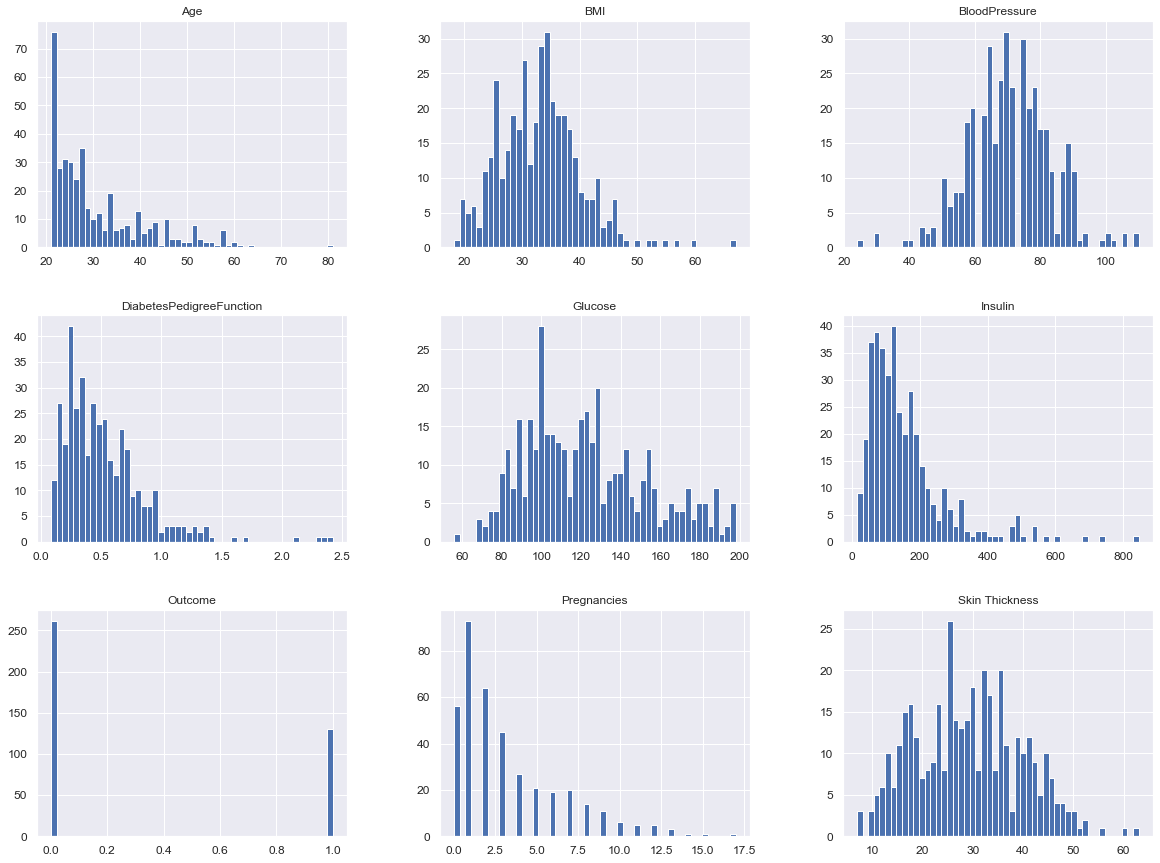

In [256]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

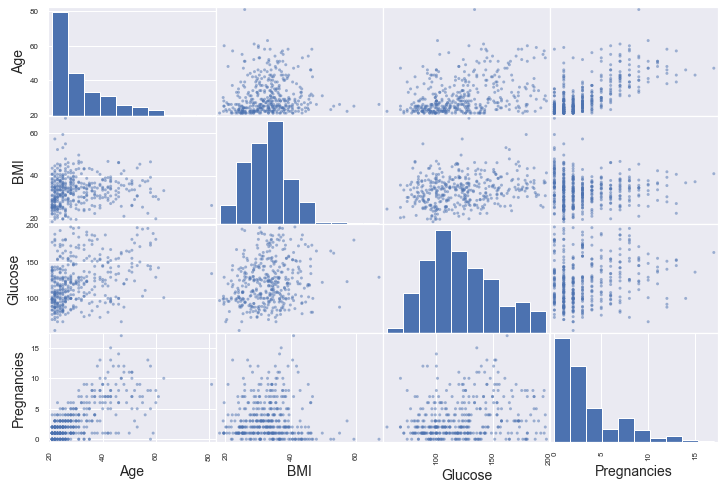

In [260]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Age", "BMI", "Glucose",
              "Pregnancies"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


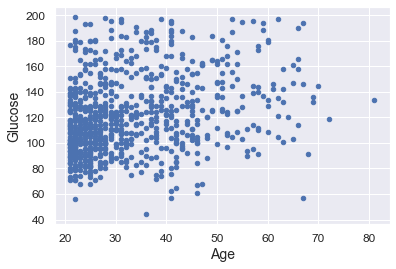

In [224]:
df.plot('Age','Glucose',kind='scatter')

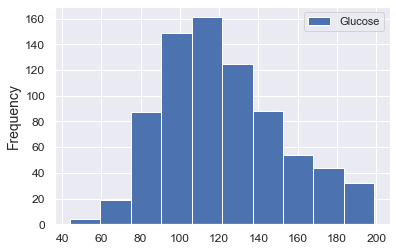

In [213]:
df.plot('Age','Glucose',kind='hist')

In [127]:
# create X and y
feature_cols = ['Age','BloodPressure','Pregnancies','BMI']
X = df[feature_cols]
y = df.Glucose

In [128]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
# print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

56.4178878465043
[ 0.64663148  0.22059761 -0.27458558  0.88833871]
